# Importación de librerías

In [2]:
from DatasetLoader import DatasetLoader
from MethodDeepGCNResNet import MethodDeepGCNResNet
from MethodDeepGATResNet import MethodDeepGATResNet
from MethodDeepLoopyResNet import MethodDeepLoopyResNet
from ResultSaving import ResultSaving
from SettingCV import SettingCV
from EvaluateAcc import EvaluateAcc
import numpy as np
import torch.nn as nn
import torch

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carga de datasets

Se cargan los datasets citados en el paper (_Cora_, _Citeseet_ y _Pubmed_), inicializando además el número de clases correspondiente para cada uno.

Ejecutaremos el dataset **Cora**, que está configurado por defecto en el código de ejemplo:

In [3]:
#---- 'cora' , 'citeseer', 'pubmed' ----

dataset_name = 'cora'

if dataset_name == 'cora':
    nclass = 7
    nfeature = 1433
elif dataset_name == 'citeseer':
    nclass = 6
    nfeature = 3703
elif dataset_name == 'pubmed':
    nclass = 3
    nfeature = 500

# Ejecución

Se testan cada uno de los modelos citados en el Paper con los distintos residuos implementados para distintas profundidades.

Ejecutaremos las siguientes celdas para comprobar los resultados.

En cada uno de los experimentos se ha decrementado el número de epochs para evitar que el kernel se interrumpa debido a problemas de memoria.

## Graph Convolutional Network

Para comprender cómo se implementan los residuos en GCN, accederemos a la clase `MethodDeepGCNResNet.py`, donde se han realizado anotaciones acerca del comportamiento de los residuos.

Originalmente el experimento estaba establecido en `1000 epochs`, se ha decrementado a `500`.

In [6]:
gcn_dict = {'naive': [],
            'raw': [],
            'graph_naive': [],
            'graph_raw': []}

In [7]:
#---- Deep GCN ResNet baseline method ----
depths = [1, 2, 3, 4, 5, 6, 7]

if True:
    for depth in depths:
        for residual_type in ['naive', 'raw', 'graph_naive', 'graph_raw']:

            acc_test_list = []
            print('Method: GCN, dataset: ' + dataset_name + ', depth: ' + str(depth) + ', residual type: ' + residual_type)
            for iter in range(1):
                #---- parameter section -------------------------------
                lr = 0.01
                epoch = 501
                weight_decay = 5e-4
                c = 0.1
                seed = iter
                dropout = 0.5
                nhid = 16
                #------------------------------------------------------

                #---- objection initialization setction ---------------
                print('Start')

                data_obj = DatasetLoader('', '')
                data_obj.dataset_source_folder_path = './data/' + dataset_name + '/'
                data_obj.c = c
                data_obj.method_type = 'GCN'

                method_obj = MethodDeepGCNResNet(nfeature, nhid, nclass, dropout, seed, depth)
                method_obj.lr = lr
                method_obj.epoch = epoch
                method_obj.residual_type = residual_type

                result_obj = ResultSaving('', '')
                result_obj.result_destination_folder_path = './result/GResNet/'
                result_obj.result_destination_file_name = 'DeepGCNResNet_' + dataset_name + '_' + residual_type + '_depth_' + str(depth) + '_iter_' + str(iter)

                setting_obj = SettingCV('', '')

                evaluate_obj = EvaluateAcc('', '')
                #------------------------------------------------------

                #---- running section ---------------------------------
                setting_obj.prepare(data_obj, method_obj, result_obj, evaluate_obj)
                acc_test = setting_obj.load_run_save_evaluate()
                print('Testing Acc: ', acc_test)
                acc_test_list.append(acc_test)
                
                # Añadimos el test_accuracy de la profundidad actual al diccionario del modelo correspondiente.
                gcn_dict[residual_type].append(acc_test)

                print('*******************************')
                #------------------------------------------------------
            print(acc_test_list)
            print(np.mean(acc_test_list), np.std(acc_test_list))
            print('Finished')

Method: GCN, dataset: cora, depth: 1, residual type: naive
Start
Loading <class 'dataset.dataset'> dataset...
(5429, 2)
Epoch: 0001 loss_train: 1.9495 acc_train: 0.1714 loss_val: 1.9403 acc_val: 0.1733 loss_test: 1.9417 acc_test: 0.1750 time: 0.0145s
Epoch: 0051 loss_train: 1.3617 acc_train: 0.9571 loss_val: 1.6916 acc_val: 0.6033 loss_test: 1.7245 acc_test: 0.5180 time: 0.0150s
Epoch: 0101 loss_train: 1.1668 acc_train: 0.9857 loss_val: 1.6022 acc_val: 0.6100 loss_test: 1.6419 acc_test: 0.5580 time: 0.0103s
Epoch: 0151 loss_train: 1.0862 acc_train: 0.9857 loss_val: 1.5591 acc_val: 0.6200 loss_test: 1.6008 acc_test: 0.5870 time: 0.0104s
Epoch: 0201 loss_train: 1.0437 acc_train: 0.9857 loss_val: 1.5325 acc_val: 0.6233 loss_test: 1.5749 acc_test: 0.5940 time: 0.0125s
Epoch: 0251 loss_train: 1.0181 acc_train: 0.9857 loss_val: 1.5141 acc_val: 0.6167 loss_test: 1.5569 acc_test: 0.6050 time: 0.0134s
Epoch: 0301 loss_train: 1.0014 acc_train: 0.9857 loss_val: 1.5005 acc_val: 0.6133 loss_test: 1

## Visualización de test accuracies (Implementación Propia)

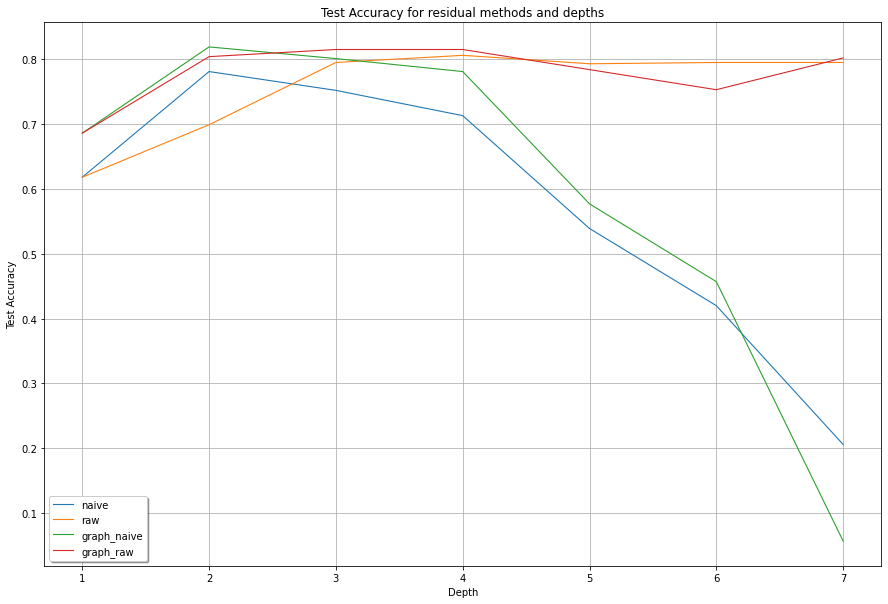

{'naive': [0.618, 0.781, 0.752, 0.713, 0.539, 0.42, 0.206],
 'raw': [0.618, 0.699, 0.795, 0.806, 0.793, 0.795, 0.795],
 'graph_naive': [0.686, 0.819, 0.801, 0.781, 0.577, 0.457, 0.057],
 'graph_raw': [0.686, 0.804, 0.815, 0.815, 0.784, 0.753, 0.802]}

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

for residual_method_name in gcn_dict:
    residual_method_scores = gcn_dict[residual_method_name]

    plt.plot(depths, residual_method_scores, linewidth = 1.1, label = residual_method_name)

plt.title(f"Test Accuracy for residual methods and depths")
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)


plt.grid(True)
plt.show()

Observamos cómo los métodos `navie` y `graph_naive` sufren una bajada de rendimiento considerable a partir de dos profundidades, mientras que los métodos `raw` y `graph_raw` se mantienen estables a medida que aumenta la profundidad.

## Graph Attention Network

Originalmente el experimento estaba establecido en `500 epochs`, se ha decrementado a `50`.

Por problemas de recursos, no ha sido posible completar la ejecución de este experimento: [GResNet issues](https://github.com/anonymous-sourcecode/GResNet/issues/1)

In [ ]:
## ---- Deep Sparse GAT baseline method ----
if True:
    for depth in [1, 2, 3, 4, 5, 6, 7]:
        for residual_type in ['naive', 'raw', 'graph_naive', 'graph_raw']:

            cuda_tag = False
            print('Method: GAT, dataset: ' + dataset_name + ', depth: ' + str(depth) + ', residual type: ' + residual_type)
            method_type = 'GAT'
            acc_test_list = []
            for iter in range(1):
                # ---- parameter section -------------------------------
                lr = 0.005
                epoch = 51
                weight_decay = 5e-4
                c = 0.1
                seed = iter
                dropout = 0.6
                nhid = 8
                nb_heads = 8
                alpha = 0.2
                patience = 100
                # ------------------------------------------------------

                # ---- objection initialization setction ---------------
                print('Start')

                data_obj = DatasetLoader('', '')
                data_obj.dataset_source_folder_path = './data/' + dataset_name + '/'
                data_obj.c = c
                data_obj.method_type = method_type

                method_obj = MethodDeepGATResNet(nfeature, nhid, nclass, dropout, seed, alpha, nb_heads, depth, cuda_tag)

                method_obj.lr = lr
                method_obj.epoch = epoch
                method_obj.weight_decay = weight_decay
                method_obj.residual_type = residual_type

                result_obj = ResultSaving('', '')
                result_obj.result_destination_folder_path = './result/GResNet/'
                result_obj.result_destination_file_name = 'DeepGATResNet_' + dataset_name + '_' + residual_type + '_depth_' + str(
                    depth) + '_iter_' + str(iter)

                setting_obj = SettingCV('', '')

                evaluate_obj = EvaluateAcc('', '')
                # ------------------------------------------------------

                # ---- running section ---------------------------------
                setting_obj.prepare(data_obj, method_obj, result_obj, evaluate_obj)
                acc_test = setting_obj.load_run_save_evaluate()
                print('Testing Acc: ', acc_test)
                acc_test_list.append(acc_test)
                print('*******************************')
                # ------------------------------------------------------
            print(acc_test_list)
            print(np.mean(acc_test_list), np.std(acc_test_list))
            print('Finished')

## Deep LoopyNet

Originalmente el experimento estaba establecido en `1000 epochs`, se ha decrementado a `500`.

In [17]:
gcn_dict = {'naive': [],
            'raw': [],
            'graph_naive': [],
            'graph_raw': []}

In [18]:
#---- Deep LoopyNet baseline method ----
depths = [1, 2, 3, 4, 5, 6, 7]

if True:
    for depth in depths:
        for residual_type in ['naive', 'raw', 'graph_naive', 'graph_raw']:
            cuda_tag = False

            print('Method: LoopyNet, dataset: ' + dataset_name + ', depth: ' + str(depth) + ', residual type: ' + residual_type)
            acc_test_list = []
            for iter in range(1):
                #---- parameter section -------------------------------
                lr = 0.01
                epoch = 501
                weight_decay = 5e-4
                c = 0.1
                seed = iter
                dropout = 0.5
                nhid = 16
                #------------------------------------------------------

                #---- objection initialization setction ---------------
                print('Start')

                data_obj = DatasetLoader('', '')
                data_obj.dataset_source_folder_path = './data/' + dataset_name + '/'
                data_obj.c = c
                data_obj.method_type = 'LoopyNet'

                method_obj = MethodDeepLoopyResNet(nfeature, nhid, nclass, dropout, seed, depth, cuda_tag)
                method_obj.lr = lr
                method_obj.epoch = epoch
                method_obj.residual_type = residual_type

                result_obj = ResultSaving('', '')
                result_obj.result_destination_folder_path = './result/GResNet/'
                result_obj.result_destination_file_name = 'DeepLoopyNetResNet_' + dataset_name + '_' + residual_type+'_depth_' + str(depth) + '_iter_' + str(iter)

                setting_obj = SettingCV('', '')

                evaluate_obj = EvaluateAcc('', '')
                #------------------------------------------------------

                #---- running section ---------------------------------
                setting_obj.prepare(data_obj, method_obj, result_obj, evaluate_obj)
                acc_test = setting_obj.load_run_save_evaluate()
                print('Testing Acc: ', acc_test)
                acc_test_list.append(acc_test)

                gcn_dict[residual_type].append(acc_test)
                
                print('*******************************')
                #------------------------------------------------------
            print(acc_test_list)
            print(np.mean(acc_test_list), np.std(acc_test_list))
            print('Finished')


Method: LoopyNet, dataset: cora, depth: 1, residual type: naive
Start
Loading <class 'dataset.dataset'> dataset...
(5429, 2)
False
Epoch: 0001 loss_train: 1.9723 acc_train: 0.1643 loss_val: 1.9222 acc_val: 0.1967 loss_test: 1.9455 acc_test: 0.1800 time: 0.0205s
Epoch: 0051 loss_train: 0.6197 acc_train: 0.9929 loss_val: 1.2285 acc_val: 0.7767 loss_test: 1.3671 acc_test: 0.7130 time: 0.0133s
Epoch: 0101 loss_train: 0.4634 acc_train: 0.9929 loss_val: 1.1077 acc_val: 0.7833 loss_test: 1.2522 acc_test: 0.7400 time: 0.0222s
Epoch: 0151 loss_train: 0.4149 acc_train: 0.9929 loss_val: 1.0588 acc_val: 0.7900 loss_test: 1.1997 acc_test: 0.7520 time: 0.0178s
Epoch: 0201 loss_train: 0.3913 acc_train: 0.9929 loss_val: 1.0308 acc_val: 0.7900 loss_test: 1.1688 acc_test: 0.7580 time: 0.0147s
Epoch: 0251 loss_train: 0.3776 acc_train: 0.9929 loss_val: 1.0129 acc_val: 0.7933 loss_test: 1.1487 acc_test: 0.7650 time: 0.0179s
Epoch: 0301 loss_train: 0.3688 acc_train: 0.9929 loss_val: 1.0008 acc_val: 0.7900 l

## Visualización de test accuracies (Implementación Propia)

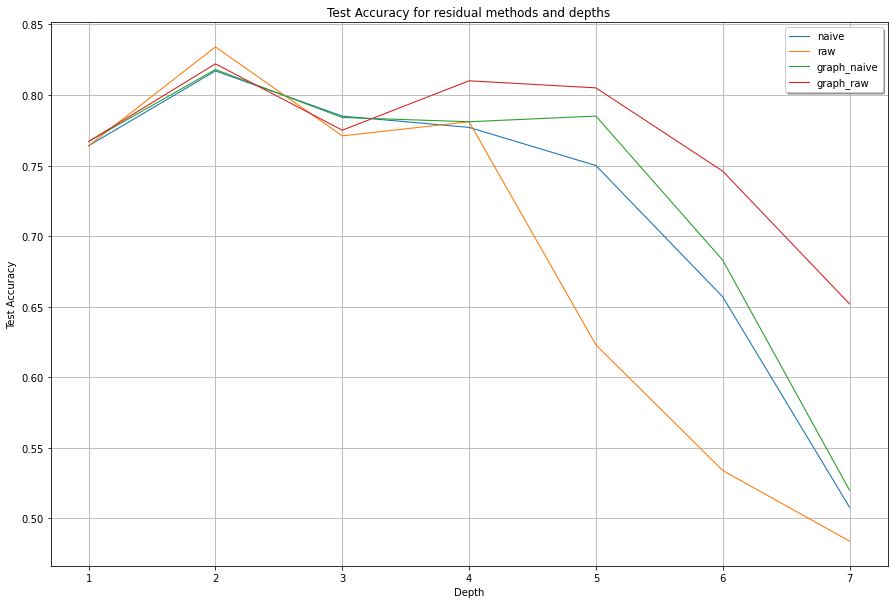

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

for residual_method_name in gcn_dict:
    residual_method_scores = gcn_dict[residual_method_name]

    plt.plot(depths, residual_method_scores, linewidth = 1.1, label = residual_method_name)

plt.title(f"Test Accuracy for residual methods and depths")
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)


plt.grid(True)
plt.show()

Observamos cómo a medida que aumenta el número de capas de la red, para LoopyNet el performacnce del modelo se ve realmente afectado para las cuatro implementaciones residuales.

No obstante, los resultados obtenidos en estos experimento pueden variar considerablemente en función de los parámetros configurados y el dataset escogido, al modificar el número de epochs no se han conseguido replicar los resultados de los experimentos del paper.